# Задание (вариант №17).

Используя правую и центральную разности численно вычислить $ f'(x) $ на отрезке $ [a, b] $ в узлах сетки.

Используя центральные разности, вычислить $ f''(x) $ со вторым и четвертым порядком точности в узлах сетки.

$$$$
$$ f(x) = \ln (\cosh (x)) $$
$$$$
$$ f'(x) = \tanh (x) $$
$$$$
$$ f''(x) = \frac{1}{\cosh^2 (x)} $$

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
def f(x: np.ndarray) -> np.ndarray:
    return np.log(np.cosh(x))

def f_d1(x: np.ndarray) -> np.ndarray:
    return np.tanh(x)

def f_d2(x: np.ndarray) -> np.ndarray:
    return 1.0 / (np.cosh(x) ** 2)

In [ ]:
a, b = -3, 3

def equispaced_points(h: float) -> np.ndarray:
    return np.linspace(a, b, int((b - a) / h))

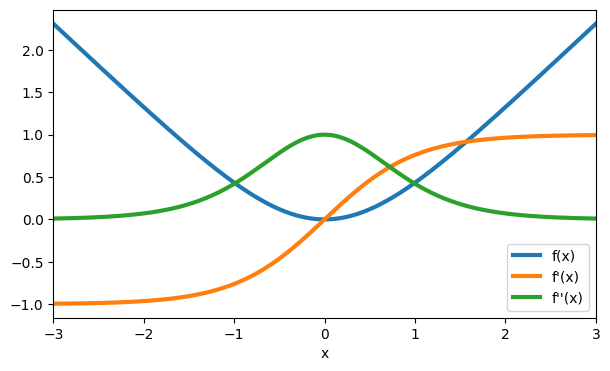

In [ ]:
plt.figure(figsize=(7, 4))
plt.xlim(a, b)
plt.xlabel("x")

x = equispaced_points(0.01)

y = f(x)
plt.plot(x, y, linewidth=3, label="f(x)")

y_d1 = f_d1(x)
plt.plot(x, y_d1, linewidth=3, label="f'(x)")

y_d2 = f_d2(x)
plt.plot(x, y_d2, linewidth=3, label="f''(x)")

plt.legend()
plt.show()

In [ ]:
def analyze(f, f_name: str, x: np.ndarray, y: np.ndarray, y_d: np.ndarray) -> float:
    mask, y_predict = f(x, y)
    plt.plot(x[mask], y_predict, linewidth=3, label=f_name)
    return float(np.max(np.abs(y_d[mask] - y_predict)))

## Численное дифференцирование

Ряд Тейлора в точке $ x_0 $:
$$ f(x) = \sum_{n=0}^{\infty} \frac{f^{(n)}(x_0)}{n!} (x - x_0)^n  $$

Будем ряд для случая сетки равномерного шага $ h $:
$$ f(x_{i+1}) = \sum_{n=0}^{\infty} \frac{f^{(n)}(x_i)}{n!} h^n $$



### Первая производная ($ f'(x) $)

#### Первый порядок точности (**правая разность**):
$$ f(x_{i+1}) = f(x_i) + h f'(x_i) + o(h) $$
$$$$
$$ f'(x_i) \approx \frac{f(x_{i+1}) - f(x_i)}{h}$$

#### Второй порядок точности (**центральная разность**):
$$ f(x_{i+1}) = f(x_i) + h f'(x_i) + \frac{h^2}{2} f''(x_i) + o(h^2) $$
$$ f(x_{i-1}) = f(x_i) - h f'(x_i) + \frac{h^2}{2} f''(x_i) + o(h^2) $$
$$$$
Вычитая, получим:
$$ f(x_{i+1}) - f(x_{i-1}) = 2 h f'(x_i) + o(h^2) $$
$$$$
$$ f'(x_i) \approx \frac{f(x_{i+1}) - f(x_{i-1})}{2 h}$$


In [ ]:
def right_difference(x: np.ndarray, y: np.ndarray) -> (np.ndarray, np.ndarray):
    h = x[1] - x[0]

    return (
        np.isfinite(np.concatenate([x[:-1], [np.nan]])),
        (y[1:] - y[:-1]) / h
    )

def central_difference(x: np.ndarray, y: np.ndarray) -> (np.ndarray, np.ndarray):
    h = x[1] - x[0]

    return (
        np.isfinite(np.concatenate([[np.nan], x[1:-1], [np.nan]])),
        (y[2:] - y[:-2]) / (2.0 * h)
    )

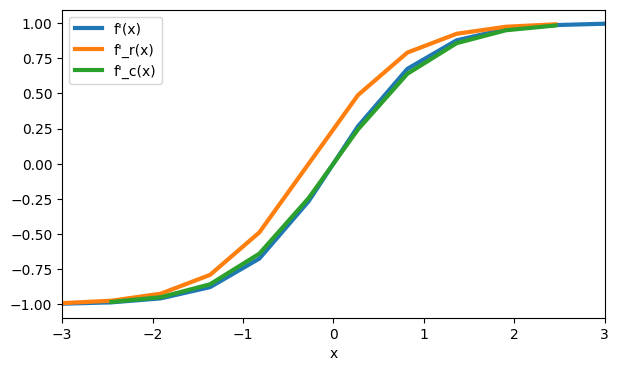

[0.2661607385096649, 0.035071577954035926]


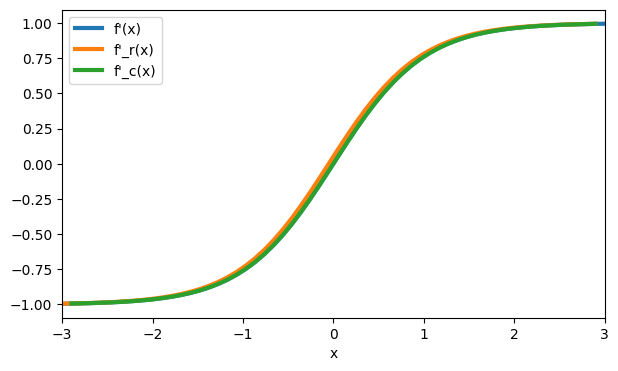

[0.05080368147639206, 0.0013241179694269967]


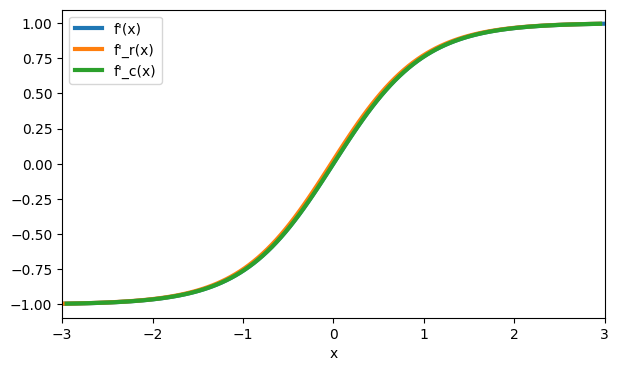

[0.02520474464865656, 0.0003256906435097351]


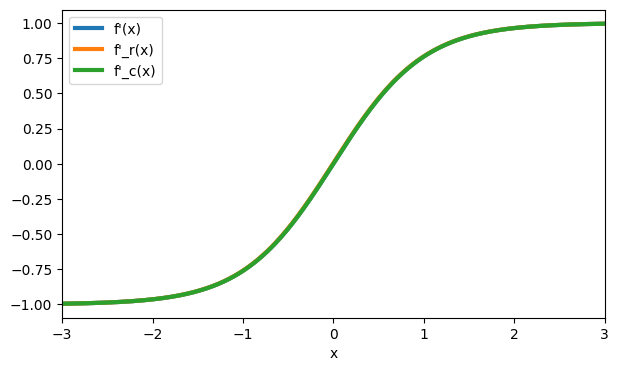

[0.005008305370132769, 1.2872473316050126e-05]


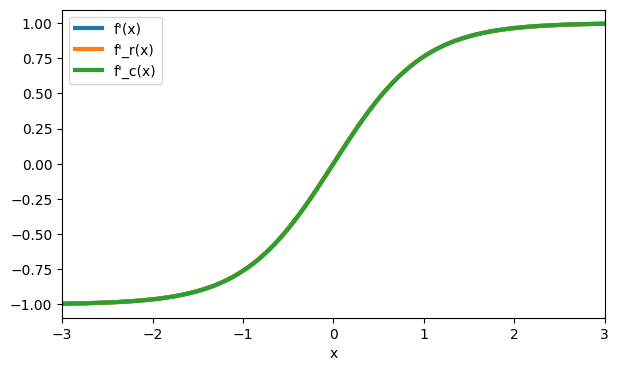

[0.0025020798495295118, 3.2128367163375415e-06]


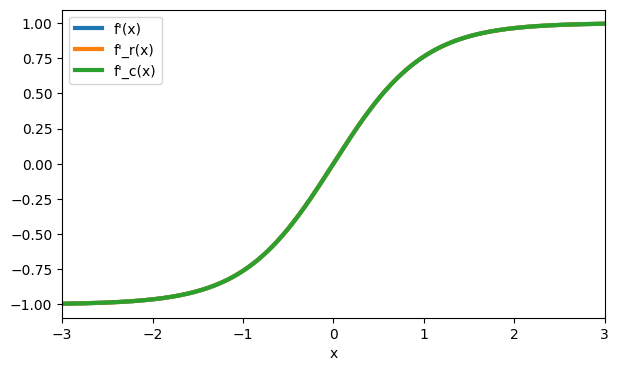

[0.0005000833055368977, 1.2834286244878257e-07]


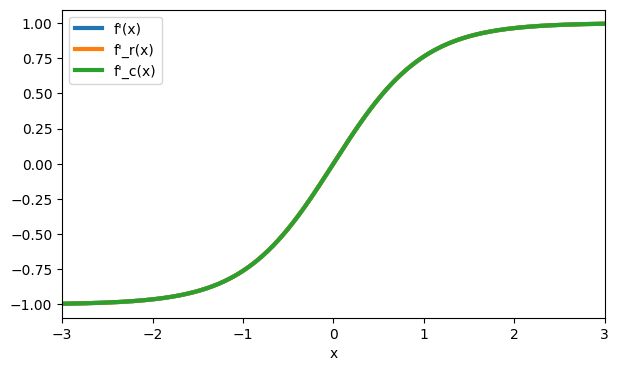

[0.0002500208298594514, 3.208038346080855e-08]


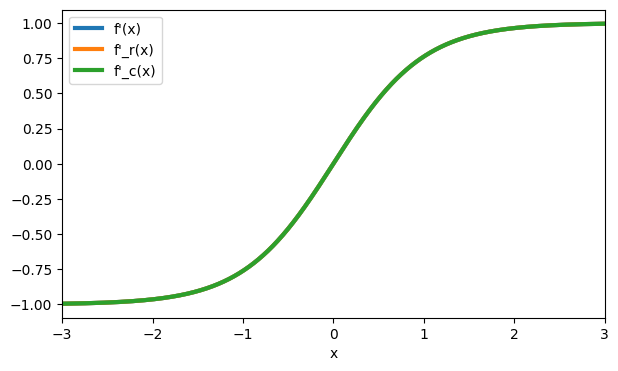

[5.0000833849013826e-05, 1.2852150454989442e-09]


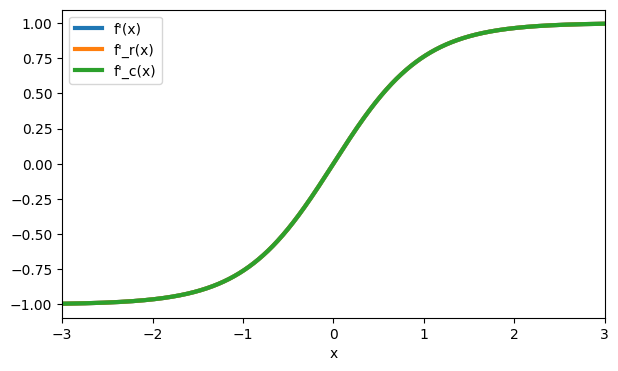

[2.5000210424601312e-05, 3.2322799992101636e-10]


In [ ]:
steps = [0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001, 0.00005]
errors = []
for h in steps:
    plt.figure(figsize=(7, 4))
    plt.xlim(a, b)
    plt.xlabel("x")

    x = equispaced_points(h)

    y_d = f_d1(x)
    plt.plot(x, y_d, linewidth=3, label="f'(x)")

    y = f(x)
    comparisons = [
        analyze(right_difference, "f'_r(x)", x, y, y_d),
        analyze(central_difference, "f'_c(x)", x, y, y_d)
    ]

    plt.legend()
    plt.show()

    print(comparisons)
    errors.append(comparisons)

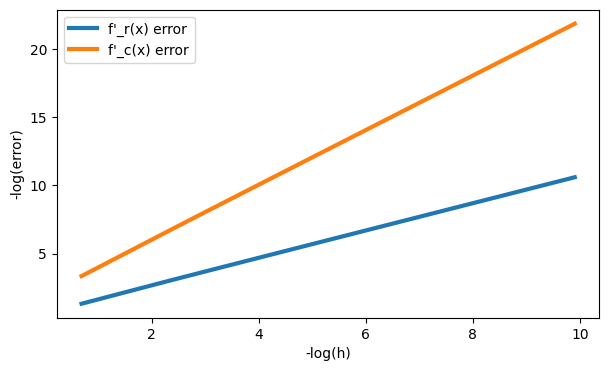

In [ ]:
plt.figure(figsize=(7, 4))
plt.xlabel("-log(h)")
plt.ylabel("-log(error)")

steps = list(map(lambda x: -np.log(x), steps))
plt.plot(steps, list(map(lambda x: -np.log(x[0]), errors)), linewidth=3, label="f'_r(x) error")
plt.plot(steps, list(map(lambda x: -np.log(x[1]), errors)), linewidth=3, label="f'_c(x) error")

plt.legend()
plt.show()

### Вторая производная ($ f''(x) $)

#### Второй порядок точности:
$$ f(x_{i+1}) = f(x_i) + h f'(x_i) + \frac{h^2}{2} f''(x_i) + o(h^2) $$
$$ f(x_{i-1}) = f(x_i) - h f'(x_i) + \frac{h^2}{2} f''(x_i) + o(h^2) $$
$$$$
Сложив, получим:
$$ f(x_{i+1}) + f(x_{i-1}) = 2f(x_i) + h^2 f''(x_i) + o(h^2)$$
$$$$
Заметим, что $ f'_c(x_{\frac{i+1}{2}}) \equiv f'_r(x_i) $, а $ f'_c(x_{\frac{i-1}{2}}) \equiv f'_r(x_{i-1}) $:
$$ f'_c(x_{\frac{i+1}{2}}) = \frac{f(x_{i+1}) - f(x_i)}{h} = f'_r(x_i) $$
$$ f'_c(x_{\frac{i-1}{2}}) = \frac{f(x_{i}) - f(x_{i-1})}{h} = f'_r(x_{i-1}) $$
Итого:
$$$$
$$ f''(x_i) \approx \frac{f(x_{i+1}) - 2f(x_i) + f(x_{i-1})}{h^2} = \frac{f'_r(x_i) - f'_r(x_{i-1})}{h} = \frac{f'_c(x_{\frac{i+1}{2}}) - f'_c(x_{\frac{i-1}{2}})}{h}$$
$$$$

#### Четвертый порядок точности:
Выражая через ряд Тейлора вторую производную с 4 порядком точности, получим:
$$ f''(x_i) \approx \frac{-f(x_{i+2}) + 16f(x_{i+1}) - 30f(x_i) + 16f(x_{i-1}) - f(x_{i-2}) }{12 h^2}$$

In [ ]:
def d2_order2(x: np.ndarray, y: np.ndarray) -> (np.ndarray, np.ndarray):
    h = x[1] - x[0]

    return (
        np.isfinite(np.concatenate([[np.nan], x[1:-1], [np.nan]])),
        (y[2:] - 2.0 * y[1:-1] + y[:-2]) / (h ** 2)
    )

def d2_order4(x: np.ndarray, y: np.ndarray) -> (np.ndarray, np.ndarray):
    h = x[1] - x[0]

    return (
        np.isfinite(np.concatenate([[np.nan, np.nan], x[2:-2], [np.nan, np.nan]])),
        (-y[4:] + 16.0 * y[3:-1] - 30.0 * y[2:-2] + 16.0 * y[1:-3] - y[:-4]) / (12.0 * h ** 2)
    )

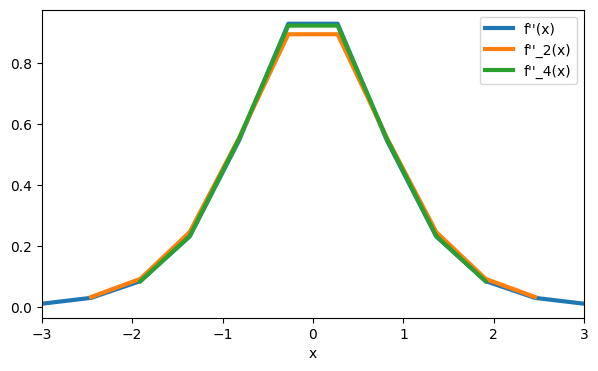

[0.03449579341144182, 0.006082412196819598]


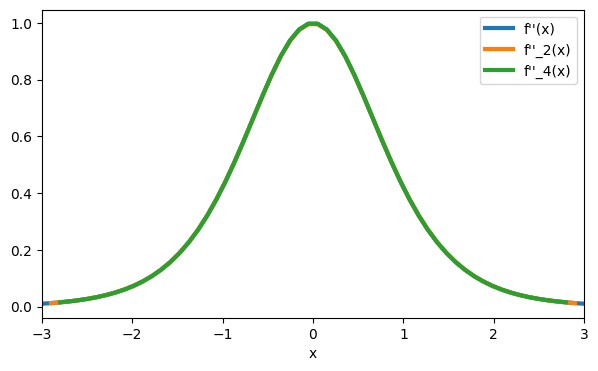

[0.0017012467147300425, 1.8315384695988257e-05]


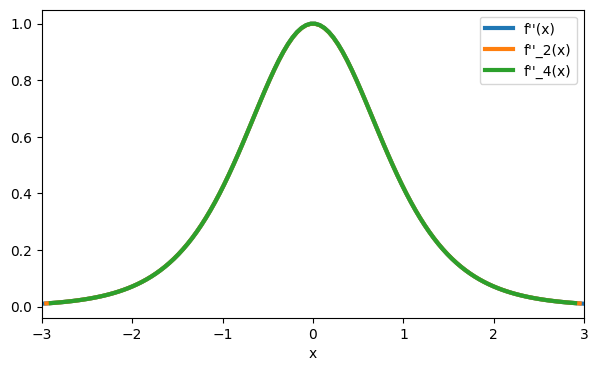

[0.00042233727154805667, 1.1383583909951867e-06]


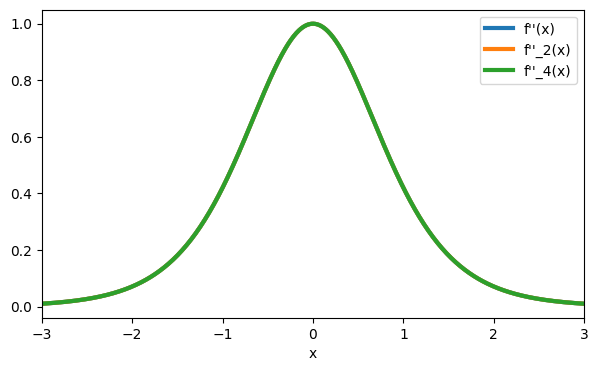

[1.6720237487111156e-05, 1.7903130089536035e-09]


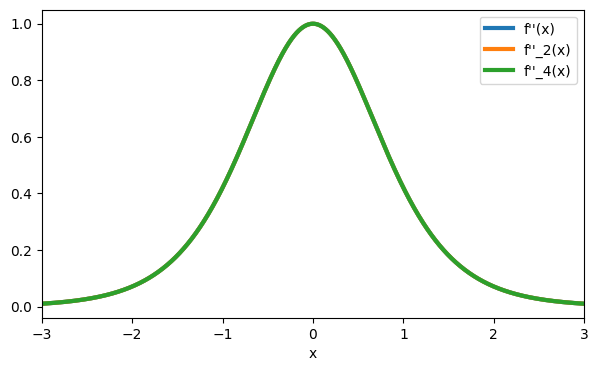

[4.173489120185003e-06, 1.174274011361831e-10]


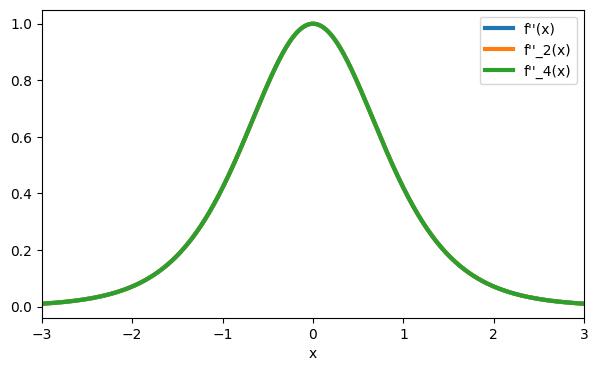

[1.6696742188848646e-07, 2.427881255415154e-09]


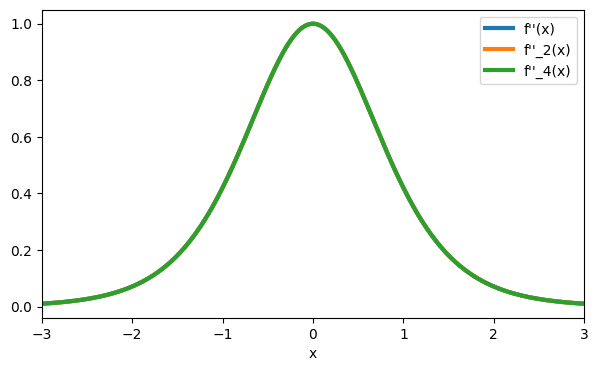

[4.308279633047363e-08, 1.0378139023506372e-08]


In [ ]:
steps = [0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005]
errors = []
for h in steps:
    plt.figure(figsize=(7, 4))
    plt.xlim(a, b)
    plt.xlabel("x")

    x = equispaced_points(h)

    y_d2 = f_d2(x)
    plt.plot(x, y_d2, linewidth=3, label="f''(x)")

    y = f(x)
    comparisons = [
        analyze(d2_order2, "f''_2(x)", x, y, y_d2),
        analyze(d2_order4, "f''_4(x)", x, y, y_d2)
    ]

    plt.legend()
    plt.show()

    print(comparisons)
    errors.append(comparisons)

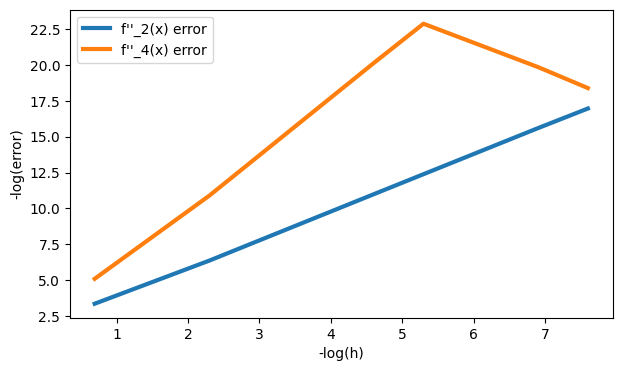

In [ ]:
plt.figure(figsize=(7, 4))
plt.xlabel("-log(h)")
plt.ylabel("-log(error)")

steps = list(map(lambda x: -np.log(x), steps))
plt.plot(steps, list(map(lambda x: -np.log(x[0]), errors)), linewidth=3, label="f''_2(x) error")
plt.plot(steps, list(map(lambda x: -np.log(x[1]), errors)), linewidth=3, label="f''_4(x) error")

plt.legend()
plt.show()

Наблюдаем понижение точности из-за машинного эпсилон и погрешности работы с слишком низким шагом -
видно, как более сложный метод начинает страдать